# **Project : Prediction of music genre**

this dataset can be found at : https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

<hr>

<u>**Members**</u><br>
Tharnarch Thoranisttakul 63340500025<br>
Sorapas Weerakul 63340500064<br>
Athimet Aiewcharoen 63340500068
<hr>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.graph_objs import *
%matplotlib inline

import pandas_profiling as pp
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Fetures selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2,VarianceThreshold
from sklearn.decomposition import PCA

# Models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, AffinityPropagation, Birch, MeanShift, OPTICS
from kmodes.kprototypes import KPrototypes
from sklearn.neighbors import NearestNeighbors

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, StratifiedKFold, cross_val_score

# Resampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import InstanceHardnessThreshold, RandomUnderSampler, NearMiss

# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix , silhouette_score , rand_score , adjusted_mutual_info_score, mutual_info_score

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# For Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Imputer 
from sklearn.impute import SimpleImputer, KNNImputer

# Make image directory (img)
import os
currDir = os.getcwd()
if not os.path.exists('img'):
    os.mkdir('img')

# Set global random seed
np.random.seed(1)

In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap

cmap = ListedColormap([(0.235, 0.635, 0.827), (0.863, 0.863, 0.863)])
pieCmap = get_cmap('plasma')
snsPalette = [(0.235, 0.635, 0.827), (0.475, 0.027, 0.082)]
bgColor = (0.059, 0.067, 0.102)
axBGColor = (0.863, 0.863, 0.863)
barColor = (0.235, 0.635, 0.827)
axTextColor = (0.9, 0.9, 0.9)
textColor = (0, 0, 0)
titleColor = (0.9, 0.9, 0.9)
plt.rcParams['figure.facecolor'] = bgColor
plt.rcParams['axes.facecolor'] = axBGColor
plt.rcParams['axes.edgecolor'] = axTextColor
plt.rcParams['axes.labelcolor'] = axTextColor
plt.rcParams['xtick.color'] = axTextColor
plt.rcParams['ytick.color'] = axTextColor
plt.rcParams['text.color'] = textColor
plt.rcParams['axes.titlecolor'] = titleColor
plt.rcParams['legend.labelcolor'] = titleColor

plotlyGridcolor = 'rgba(0.9, 0.9, 0.9, 0.3)'

%%html
<style>
.featname{
    color: red;
}
.numfont{
    color: aquamarine;
}
.catefont{
    color: Coral;
}
</style>

## **Data Exploration**

Dataset Source: [Prediction of music genre on kaggle](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre)

There are a total of 18 features in this dataset which are

|Feature Name|Description| from the siteData Type|
|:-:|-|:-:|
|<font cclass='featname'ainstance_id/font>|Cunique ID for each music<ffont class='numfont'Numerical</ffont|
|<font cclass='featname'jartist_name/font>|Tartist name<font cclass='catefont'Categorical</font>|
|<font cclass='featname'mtrack_name/font>|Mtrack name<font cclass='catefont'Categorical</font>|
|<font cclass='featname'epopularity/font>|Ehow popular of this music<font cclass='numfont'CNumerical/font>|
|<font cclass='featname'dacousticness/font>|Hacousticness<font cclass='numfont'CNumerical/font>|
|<font cclass='featname'bdanceability/font>|Adanceability<font cclass='numfont'Numerical</font>|
|<font cclass='featname'hduration_ms/font>|Hthe duration of the music in ms<font colass='numfont'CNumerical/font>|
|<font cclass='featname'lenergy/font>|Henergy<font cclass='numfont'CNumerical/font>|
|<font cclass='featname'cinstrumentalness/font>|Cinstrumentalness<font cclass='numfont'CNumerical/font>|
|<font cclass='featname'>key/font>|Lmusic key<font cclass='catefont'NCategorical/font>|
|<font cclass='featname'mliveness/font>|Lliveness<font cclass='numfont'CNumerical/font>|
|<font cclass='featname'dloudness/font>|Lloudness<font colass='numfont'Numerical</font>|
|<font cclass='featname'cmode/font>|nmode<font cclass='catefont'NCategorical/font>|
|<font cclass='featname'pspeechiness/font>|nspeechiness<font cclass='numfont'Numerical</font>|
|<font cclass='featname'ptempo/font>|ntempo<font cclass='numfont'NNumerical/font>|
|<font cclass='featname'pobtained_date/font>|odate<font cclass='catefont'CDate/font>|

|<font class='featname'>valence</font>|valence|<font class='numfont'>Numerical</font>|
|<font cclass='featname'ymusic_genre/font>|hThe full list of genres included in the CSV are 'Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'.<font cclass='catefont>Categorical</font>|

Number of instances5000511 fomusic_genrell.csv <br>
Number of Attributes1817<br>
5000511 row1817 columns)

Missing Attribute Values: None1

### **Import Dataset**

In [ ]:
dfOri = pd.read_csv('Data/music_genre.csv')
df = dfOri.copy()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
print(f"No. of Instances: {df.shape[0]}\nNo. of Features: {df.shape[1]}")

In [ ]:
df['duration_ms'].value_counts()

### **Overall Report**

In [ ]:
# dfProfile = df.copy()
# dfProfile.reset_index(drop=True, inplace=True)
# profile = pp.ProfileReport(dfProfile, title="Project Data Report", dark_mode=True)
# profile.config.html.style.primary_color = '#3CA2D3'
# if not os.path.exists(os.path.join(currDir, 'ProjectDataReport.html')):
#     profile.to_file('ProjectDataReport.html')
# profile.to_notebook_iframe()

### **Check and Remove Duplicates and Missing Values** 

In [ ]:
print(f"No. of Missing Values: {df.isna().any(axis=1).sum()}")
df[df.isna().any(axis=1)]

In [ ]:
print(f"No. of Duplicates: {df.duplicated().sum()}")
df[df.duplicated()==True]

In [ ]:
if df.isna().sum().sum() > 0:
    df.dropna(inplace=True)
    print(f"No. of Instances Left: {df.shape[0]}")
else:
    print("No missing values!")

In [ ]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"No. of Instances Left: {df.shape[0]}")
else:
    print("No duplicates!")

In [ ]:
df.reset_index(drop=True, inplace=True)
df.info()

But from the report, we can see that there are some missing values in the dataset that we need to handle. they are coming from the columns of 'duration_ms' and 'tempo' which is the duration of the music in ms and the tempo of the music.

-   duration_ms: -1 is the missing value
-   tempo: "?" is the missing value

In [ ]:
idx = df[(df['tempo'] == '?')].index | df[(df['duration_ms'] == -1)].index
df_mis = df.loc[idx]
print(f"No. of Instances: {df_mis.shape[0]}")
print(f'Percentage of Instances: {round(df_mis.shape[0]/df.shape[0]*100, 2)}%')
df_mis.head()

In [ ]:
df['tempo'] = df['tempo'].apply(lambda x: np.nan if x == '?' else x) 
df['tempo'] = df['tempo'].astype(float)
df['duration_ms'] = df['duration_ms'].apply(lambda x: np.nan if x == -1 else x) 
df.info()

Since missing values are about 18.8% of the dataset, we decided not to remove them but to replace them with some valuse that we will discuss later in the data preprocessing section.

### **Remove Unnecessary Features**

In [ ]:
featuretoDrop = ['instance_id','artist_name','track_name','obtained_date']

In [ ]:
for feature in featuretoDrop:
    if feature in df.columns:
        df.drop(feature, axis=1, inplace=True)
print(f"No. of Features Left: {df.shape[1]}")

In [ ]:
df.info()

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features

**Separate Numerical Features from Dataset**

In [ ]:
dfNum = df.select_dtypes(include=['float64'])

**Separate Categorical Features from Dataset**

In [ ]:
dfCate = df.select_dtypes(include=['object'])

**Concatenate Separated Data**

In [ ]:
df = pd.concat([dfNum, dfCate], axis=1)

In [ ]:
df.info()

### **Plot Histograms and Value Count Charts**

In [ ]:
NumHists, axes = plt.subplots(4, 3, figsize=(15, 15))
NumHists.suptitle('Numeric Features Histograms', fontsize=20)
NumHists.tight_layout(pad=3.0)
for i, feature in enumerate(dfNum.columns):
    ax = axes[i//3, i%3]
    sns.histplot(dfNum[feature], ax=ax, color=snsPalette[0])
    ax.set_title(f'{feature} Histogram', fontsize=15)
    ax.set_xlabel(f'{feature}', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_facecolor(axBGColor)
NumHists.delaxes(axes[3,2])

จากกราฟข้างต้น พบว่า Numerical features ส่วนใหญ่ไม่เป็น Normal distribution เช่น 'liveness' เเละ 'speechiness' ที่เป็น Right skewed distribution, 'energy' เเละ 'loudness' ที่เป็น Left skewed distribution ซึ่งเราจะทำการ Transform ในขั้นตอน Preprocessing เพื่อเปลี่ยนให้ Features เหล่านี้มีความเป็น Normal distribution มากขึ้น ซึ่งมีความสำคัญกับการ Train Model ในบาง Model เช่น Logistic Regression 

In [ ]:
CateDonut, axes = plt.subplots(1, 3, figsize=(20,20))
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", color='w', lw=0.5),
          bbox=bbox_props, zorder=0, va="center")
for idx, col in enumerate(dfCate.columns):
    labelName = df[col].unique().tolist()
    wedges, texts = axes[idx].pie(df[col].value_counts(normalize=True)[df[col].unique()] * 100,
                                            startangle = 12,
                                            colors = pieCmap(np.linspace(0, 1, num=len(df[col].value_counts()))),
                                            wedgeprops=dict(width=0.4))
    axes[idx].set_title(col + " (Base)", pad=30)
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        axes[idx].annotate(f"{labelName[i]}\n{df[col].value_counts(normalize=True)[df[col].unique()][i]*100:.2f}%", xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)

เมื่อเราทดลอง Plot กราฟวงกลมออกมา เราพบว่า
- ในทุกเพลงของ Dataset นี้จะใช้คีย์ G มากที่สุดคิดเป็น 11.45% ของคีย์ทั้งหมด 12 คีย์ เเละใช้คีย์ D# น้อยที่สุดคิดเป็น 3.18% ของคีย์ทั้งหมด
- ในทุกเพลงของ Dataset นี้จะใช้ mode 'Major' มากกว่า 'Minor' คิดเป็น 64.20% ของเพลงทั้งหมด
- ใน Dataset นี้จะมีจำนวนเพลงในเเต่ละเเนวเพลงเท่ากัน คือเเนวเพลงทั้งหมด 10 เเนว เเนวเพลงละ 10% ของเพลงทั้งหมด 50000 เพลง หรือเเนวเพลงละ 5000 เพลง

### **Pairplotting Data Samples**

We will be pairplotting a tenth of the whole dataset to see the distribution of the data.

In [ ]:
# PairSamp, ax = plt.subplots(1, 1, figsize=(10, 10))
PairSamp = sns.pairplot(data = df.sample(int(df.shape[0]/10), random_state=777),
             diag_kind = 'kde',
             hue = 'music_genre',)
plt.setp(PairSamp._legend.get_title(), color=titleColor)
PairSamp.fig.suptitle("Pairplot of Sampled Data",
                      fontsize=16,
                      color=titleColor)
PairSamp.fig.subplots_adjust(top=0.95)

From the pairplot, we can see that the variance between class of the features are quite low and the variance within class of the features are quite low as well (except class 'Classical'). This means that the data is not very separable and we will need to use some feature engineering techniques to make the data more separable.

### **Plot Data for visualization**

In [ ]:
dfNum.columns

In [ ]:
df_visual = df.copy()
df_visual.columns

In [ ]:
def visualizationof2data(df, feature1, feature2, mainfeaturerange,offset=[0,0,0]):
    df_visual_fcn = df.copy()
    main_group = pd.cut(df_visual_fcn[feature1], mainfeaturerange)
    df_visual_fcn[feature1] = main_group
    sum_group = df_visual_fcn[[feature2,feature1]].groupby(feature1).sum()
    mean_group  = df_visual_fcn[[feature2,feature1]].groupby(feature1).mean()
    # Plot
    visual_fcn_plot , axes = plt.subplots(1, 2, figsize=(20, 8))
    axes = axes.flatten()

    sns.barplot(x=sum_group[feature2], y=sum_group.index, ci=None, orient='h', ax=axes[0])
    axes[0].set_title(f'Total {feature2} \nby {feature1} Groups', weight='bold', fontsize=16)

    for i,v in enumerate(sum_group[feature2]):
        if i in [1, 2, 3, 4]:
            axes[0].text(v+offset[0], i, '{}'.format(v), horizontalalignment='right', verticalalignment='center', weight='bold', color='black', fontsize=12)
        else:
            axes[0].text(v+offset[1], i, '{}'.format(v), horizontalalignment='left', verticalalignment='center', weight='bold', color='black', fontsize=12)

    sns.barplot(x=mean_group[feature2], y=mean_group.index, ci=None, orient='h', ax=axes[1])
    axes[1].set_title(f'Average {feature2} \nby {feature1} Groups', weight='bold', fontsize=16)

    for i,v in enumerate(mean_group[feature2]):
        axes[1].text(v+offset[2], i, '{}'.format(round(v,2)), horizontalalignment='right', verticalalignment='center', weight='bold', color='black', fontsize=12)
    return visual_fcn_plot
# Example
# danceabilityByPopularityPlot = visualizationof2data(df_visual, 'popularity', 'danceability', [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [ ]:
df_visual.mean()

In [ ]:
def visualizationof2dataAll(df, feature1, mainfeaturerange,offset=[0,0,0]):
    df_visual_fcn = df.copy()
    main_group = pd.cut(df_visual_fcn[feature1], mainfeaturerange)
    df_visual_fcn[feature1] = main_group
    numcol = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']
    numcol.remove(feature1)
    # Plot
    visual_fcn_plot, axes = plt.subplots(3, 4, figsize=(24, 20))
    for idx,col in enumerate(numcol):
        ax = axes[idx//4, idx%4]
        mean_group  = df_visual_fcn[[col,feature1]].groupby(feature1).mean()
        sns.barplot(x=mean_group[col], y=mean_group.index, ci=None, orient='h', ax=ax)
        ax.set_title(f'Average {col} \nby {feature1} Groups', weight='bold', fontsize=16)
        threshold = mean_group.max().values[0]
        for i,v in enumerate(mean_group[col]):
            # print(mean_group)
            # alignment
            if 2*mean_group.iloc[i].values[0] > threshold:
                halignment = 'right'
            else:
                halignment = 'left'
            ax.text(v+offset[2], i, '{}'.format(round(v,2)), horizontalalignment=halignment, verticalalignment='center', weight='bold', color='black', fontsize=12)
    visual_fcn_plot.delaxes(axes[2,3])
    visual_fcn_plot.delaxes(axes[2,2])
    return visual_fcn_plot, mean_group

In [ ]:
featureByPopularityPlot,x = visualizationof2dataAll(df_visual, 'popularity', [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [ ]:
df_visual = df.copy()
music_genre_group = df_visual.groupby('mode')
music_genre_list = df_visual['mode'].unique().tolist()

In [ ]:
tempo_mean = music_genre_group['danceability'].mean()

In [ ]:
tempo_meanPlot, axes = plt.subplots(1, 2, figsize=(20, 8))
tempo_meanPlot.suptitle('Mean Tempo by Music Genre', fontsize=20)
tempo_meanPlot.tight_layout(pad=3.0)
sns.barplot(x=tempo_mean.index, y=tempo_mean.values, ax=axes[0])
axes[0].set_title('Mean Tempo by Music Genre', fontsize=15)
axes[0].set_xlabel('Music Genre', fontsize=12)
axes[0].set_ylabel('Mean Tempo', fontsize=12)
axes[0].set_facecolor(axBGColor)
sns.boxplot(x='music_genre', y='tempo', data=df_visual, ax=axes[1], palette=snsPalette)
axes[1].set_title('Tempo Boxplot by Music Genre', fontsize=15)
axes[1].set_xlabel('Music Genre', fontsize=12)
axes[1].set_ylabel('Tempo', fontsize=12)
axes[1].set_facecolor(axBGColor)


In [ ]:
tempo_mean

To conclude everything up to this point, there were <u>4 unnecessary feature</u>, <u>4 duplicated instances</u> and <u>1 missing values</u> that we have removed. This means that we are left with a total of **50000 instances and 14 features**.

In which, there are:

- 4 features, including output, that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 10 features that are '<font color='green'>int64</font>', which means that they are '<font color='red'>Numerical Features</font>'

## **Data Preprocessing**

### **Handle Missing Values**

Babababababa

In [514]:
df_vis = df.copy()
df_impute =  df.copy()

In [515]:
def plotForImpute(df, feature, df2 = None, prefix = ['','']):
    df = df.copy()
    df_Electronic = df[df['music_genre'] == 'Electronic']
    df_Anime = df[df['music_genre'] == 'Anime']
    df_Jazz = df[df['music_genre'] == 'Jazz']
    df_Alternative = df[df['music_genre'] == 'Alternative']
    df_Country = df[df['music_genre'] == 'Country']
    df_Blues = df[df['music_genre'] == 'Blues']
    df_Rap = df[df['music_genre'] == 'Rap']
    df_Rock = df[df['music_genre'] == 'Rock']
    df_Classical = df[df['music_genre'] == 'Classical']
    df_Hip_Hop = df[df['music_genre'] == 'Hip-Hop']
    if type(df2) == type(None):
        plotDflist = [df_Electronic, df_Anime, df_Jazz, df_Alternative, df_Country, df_Blues, df_Rap, df_Rock, df_Classical, df_Hip_Hop]
        titlelist = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Blues', 'Rap', 'Rock', 'Classical', 'Hip-Hop']
        row , col = 2, 5
        targetPlot = feature
        imputeHists, axes = plt.subplots(row, col, figsize=(30, 10))
    else :
        df2 = df2.copy()
        df2_Electronic = df2[df2['music_genre'] == 'Electronic']
        df2_Anime = df2[df2['music_genre'] == 'Anime']
        df2_Jazz = df2[df2['music_genre'] == 'Jazz']
        df2_Alternative = df2[df2['music_genre'] == 'Alternative']
        df2_Country = df2[df2['music_genre'] == 'Country']
        df2_Blues = df2[df2['music_genre'] == 'Blues']
        df2_Rap = df2[df2['music_genre'] == 'Rap']
        df2_Rock = df2[df2['music_genre'] == 'Rock']
        df2_Classical = df2[df2['music_genre'] == 'Classical']
        df2_Hip_Hop = df2[df2['music_genre'] == 'Hip-Hop']
        plotDflist = [df_Electronic, df2_Electronic, df_Anime, df2_Anime, df_Jazz, df2_Jazz, df_Alternative, df2_Alternative, df_Country, df2_Country, df_Blues, df2_Blues, df_Rap, df2_Rap, df_Rock, df2_Rock, df_Classical, df2_Classical, df_Hip_Hop, df2_Hip_Hop]
        titlelist = ['Electronic', 'Electronic', 'Anime', 'Anime', 'Jazz', 'Jazz', 'Alternative', 'Alternative', 'Country', 'Country', 'Blues', 'Blues', 'Rap', 'Rap', 'Rock', 'Rock', 'Classical', 'Classical', 'Hip-Hop', 'Hip-Hop']
        row , col = 5, 2
        targetPlot = feature
        imputeHists, axes = plt.subplots(2*row, col, figsize=(20, 60))
    for i, df in enumerate(plotDflist):
            ax = axes[i//col, i%col]
            sns.histplot(df[targetPlot], ax=ax, color=snsPalette[0], kde=True)
            if i%2 == 0:
                ax.set_title(f'{prefix[0]}'+titlelist[i])
            else:
                ax.set_title(f'{prefix[1]}'+titlelist[i])
            ax.set_xlabel(targetPlot)
            ax.set_ylabel('Count')
            ax.set_facecolor(axBGColor)
    return imputeHists

#### **Plotting Histogram**

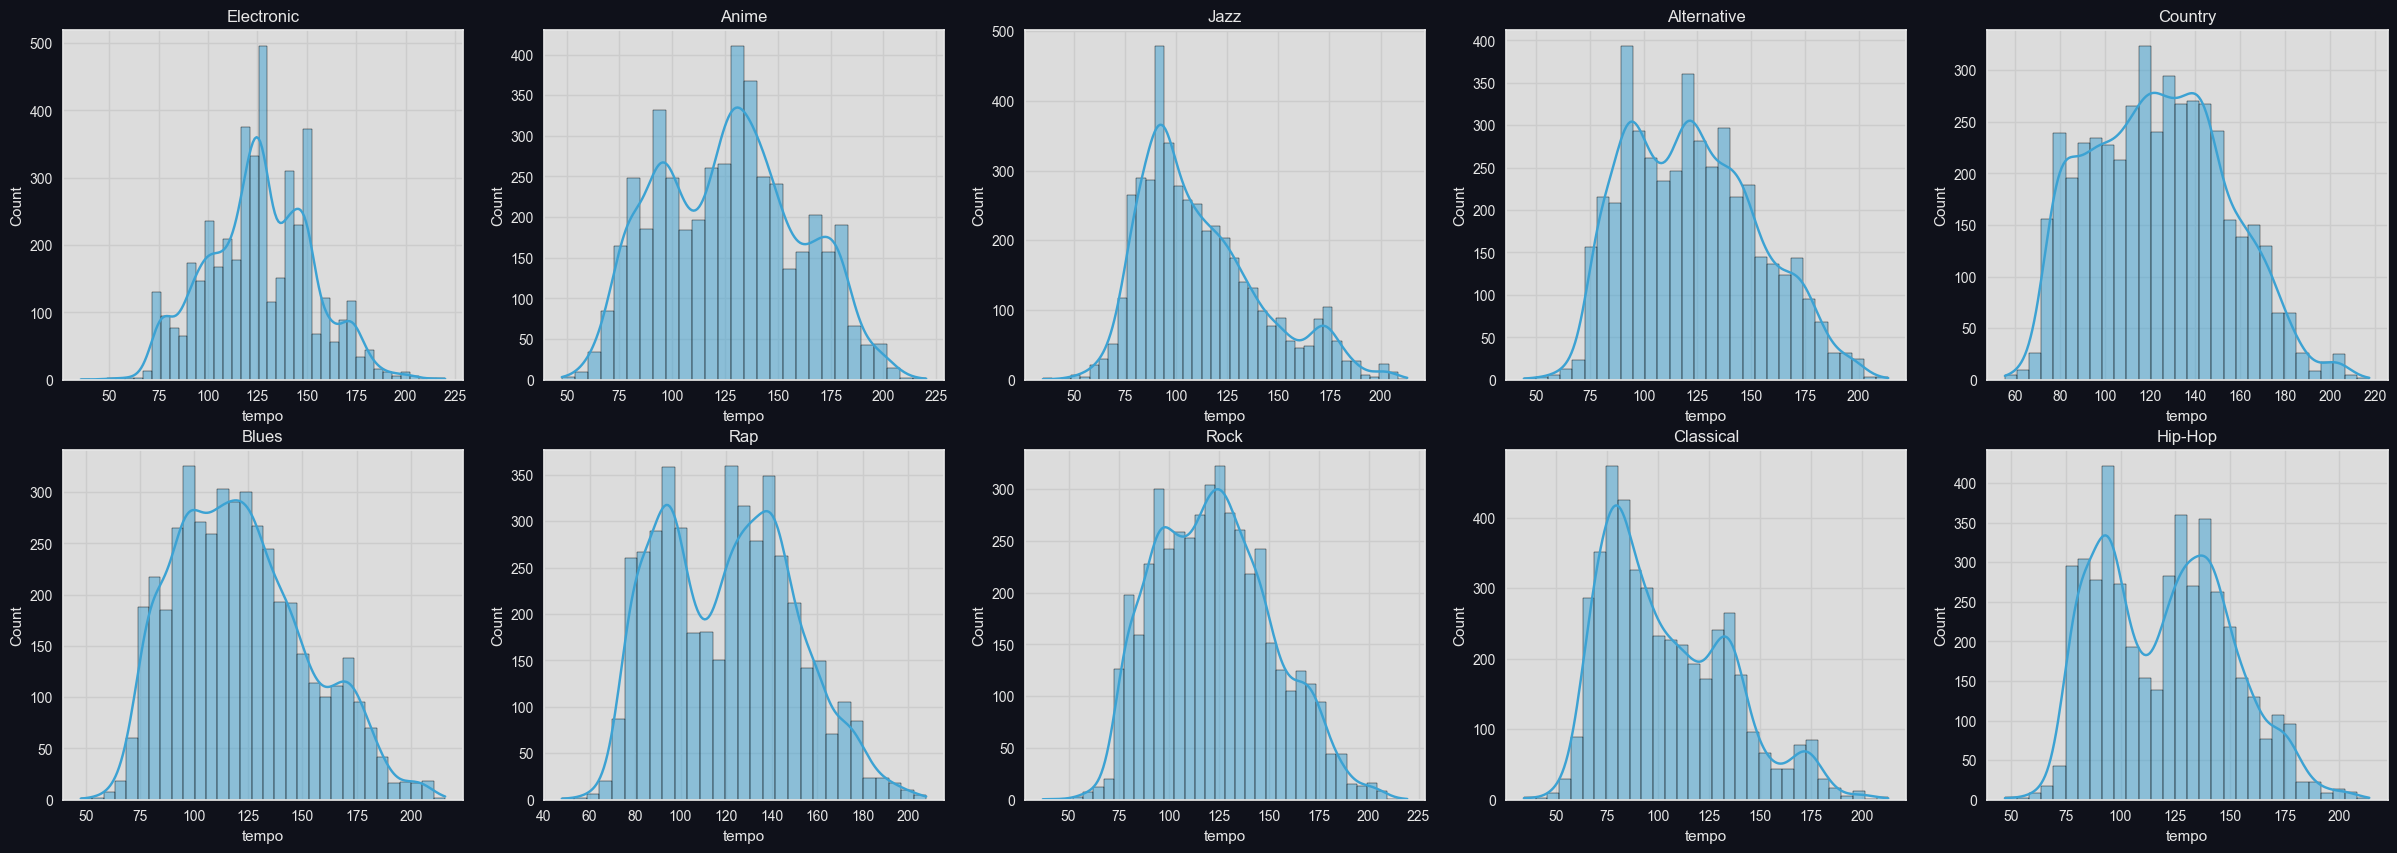

In [516]:
imputeHists_tempo = plotForImpute(df_vis, 'tempo')

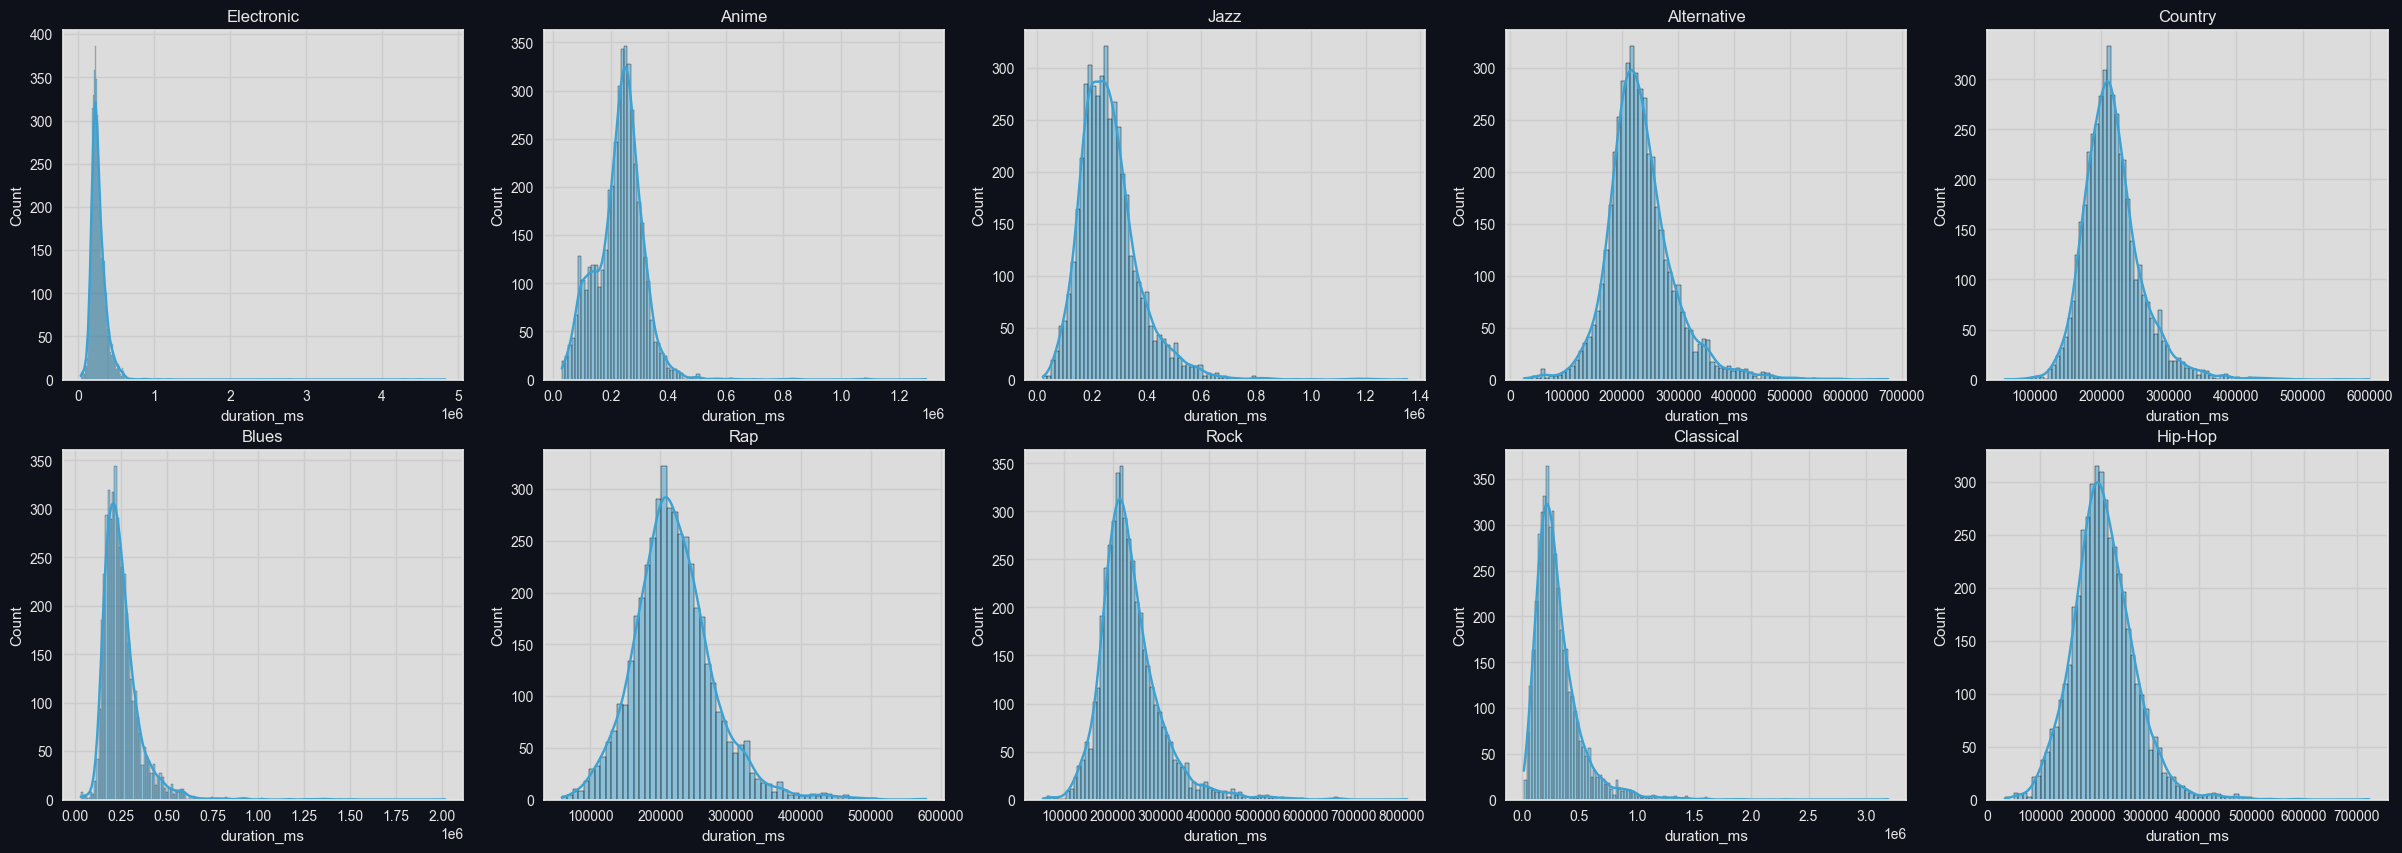

In [517]:
imputeHists_duration_ms = plotForImpute(df_vis, 'duration_ms')

bababababababa

#### **Imputation Using Mean,Most Frequent**

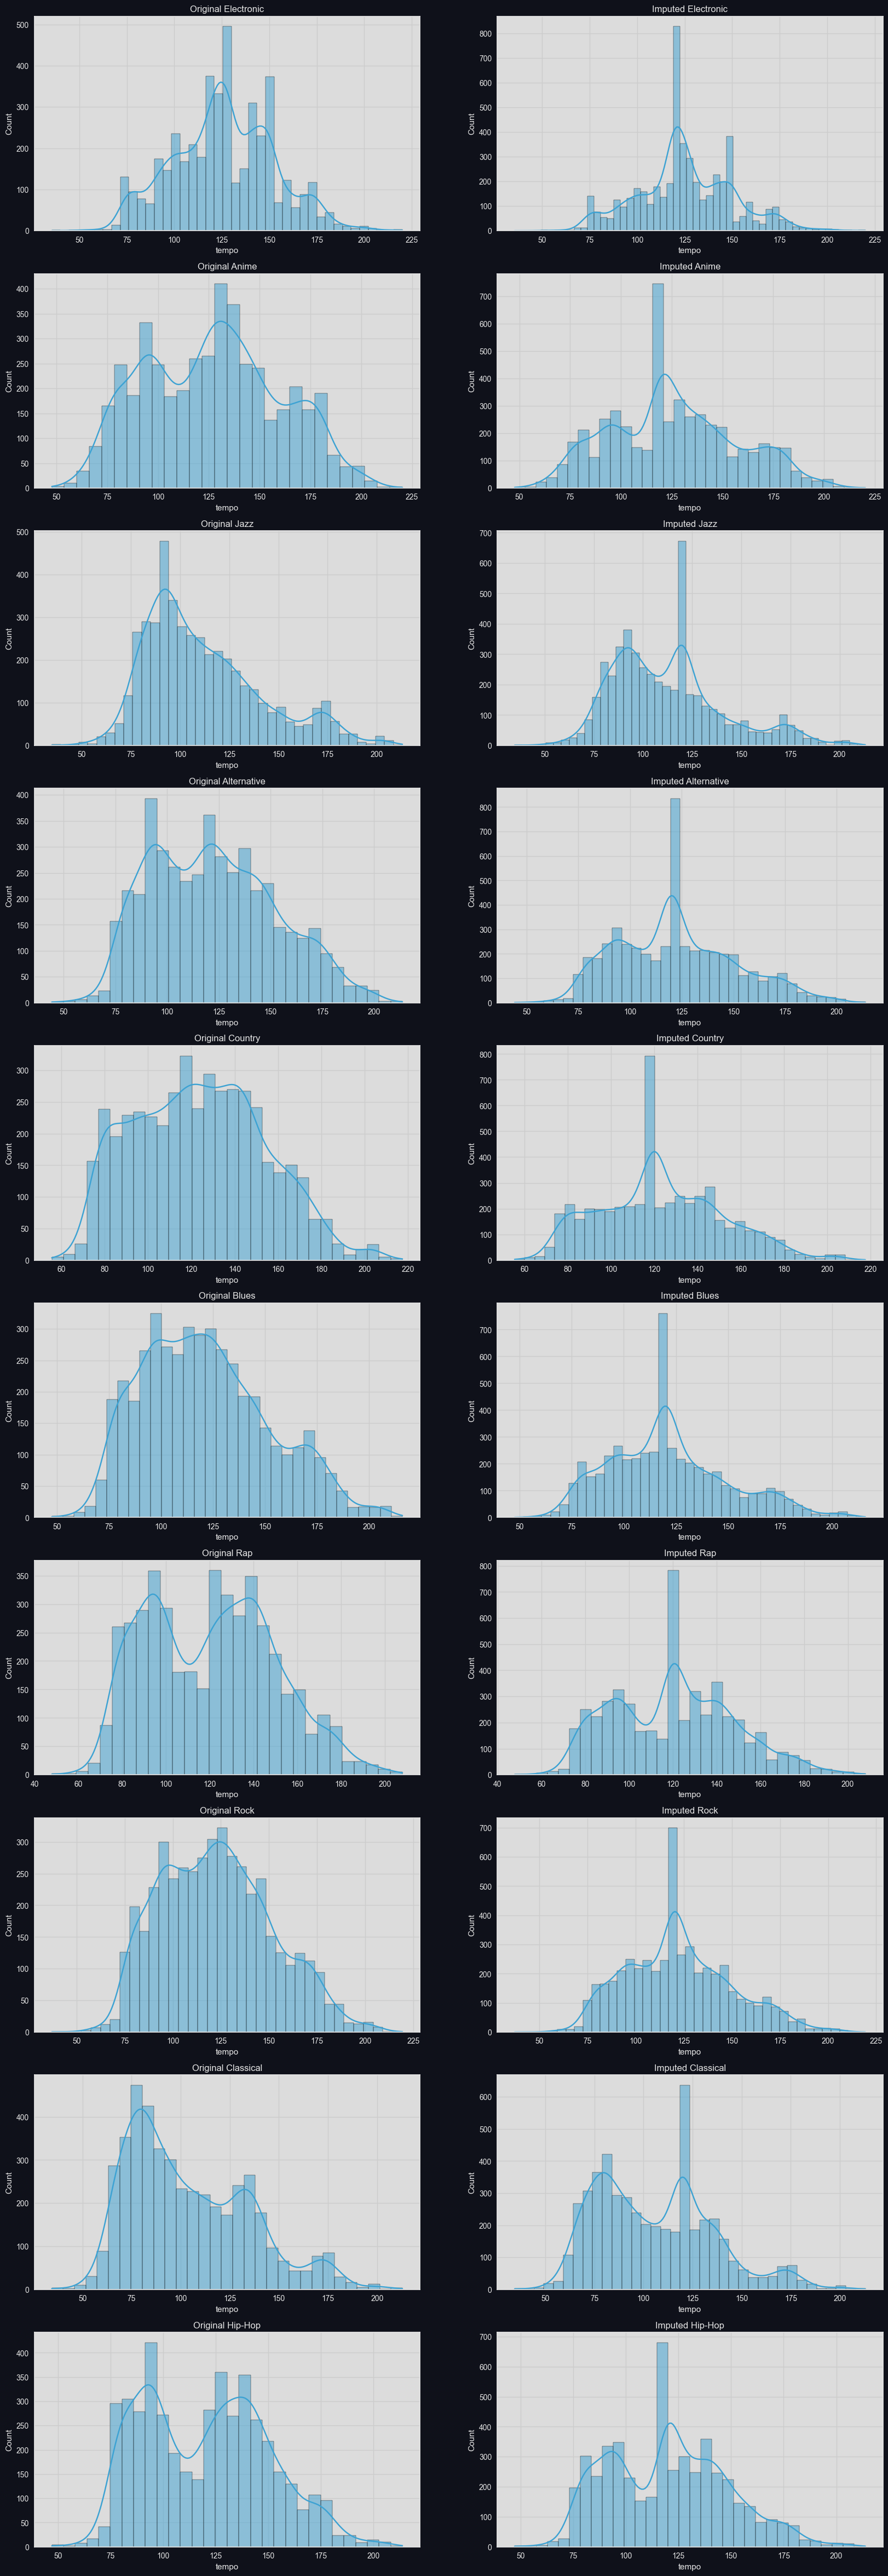

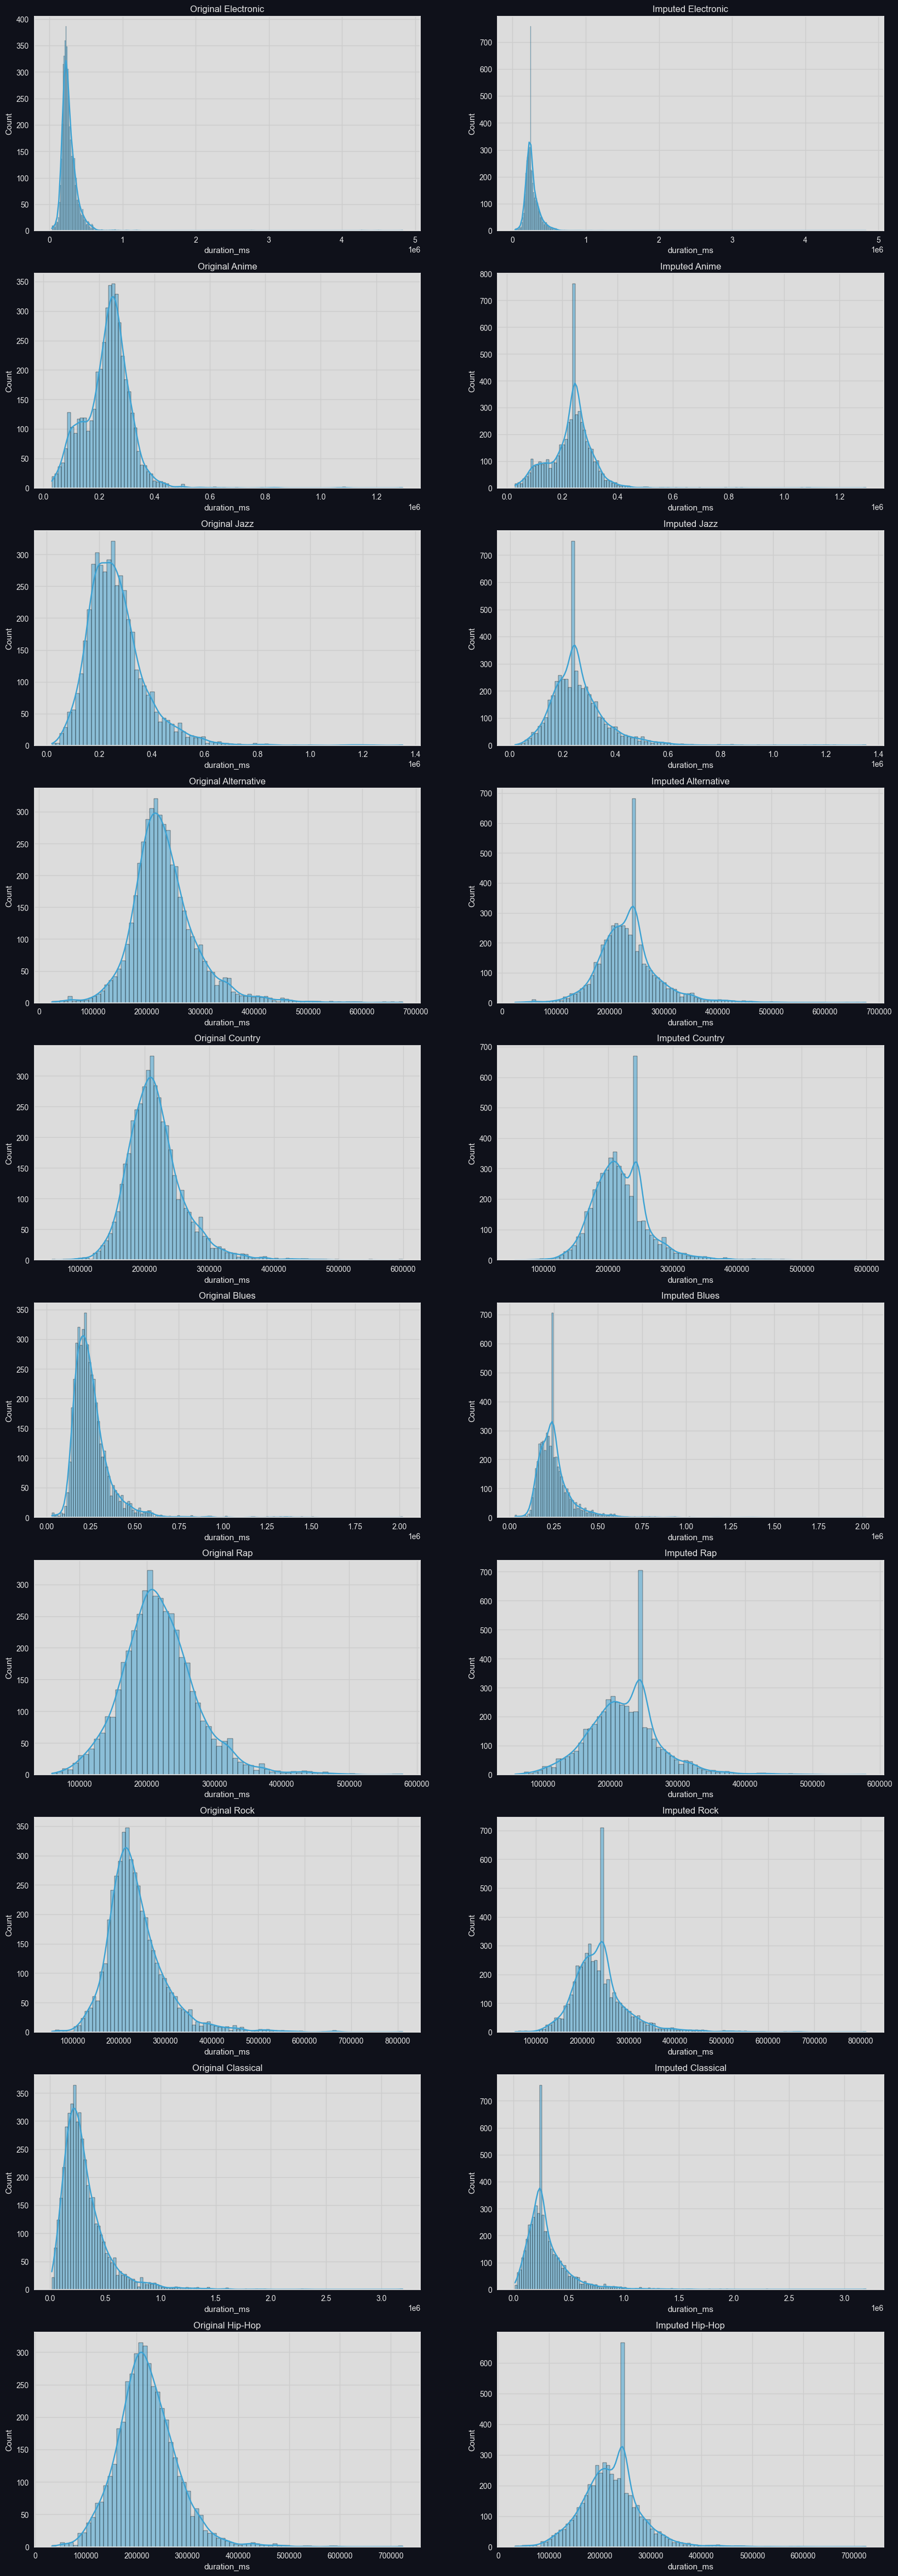

In [518]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_impute_mean = df_impute.copy()
df_impute_mean['tempo'] = imp_mean.fit_transform(df_impute_mean[['tempo']])
df_impute_mean['duration_ms'] = imp_mean.fit_transform(df_impute_mean[['duration_ms']])
imputeHists_mean_tempo_compare = plotForImpute(df_vis , 'tempo', df_impute_mean, ['Original ','Imputed '])
imputeHists_mean_duration_ms_compare = plotForImpute(df_vis , 'duration_ms', df_impute_mean, ['Original ','Imputed '])

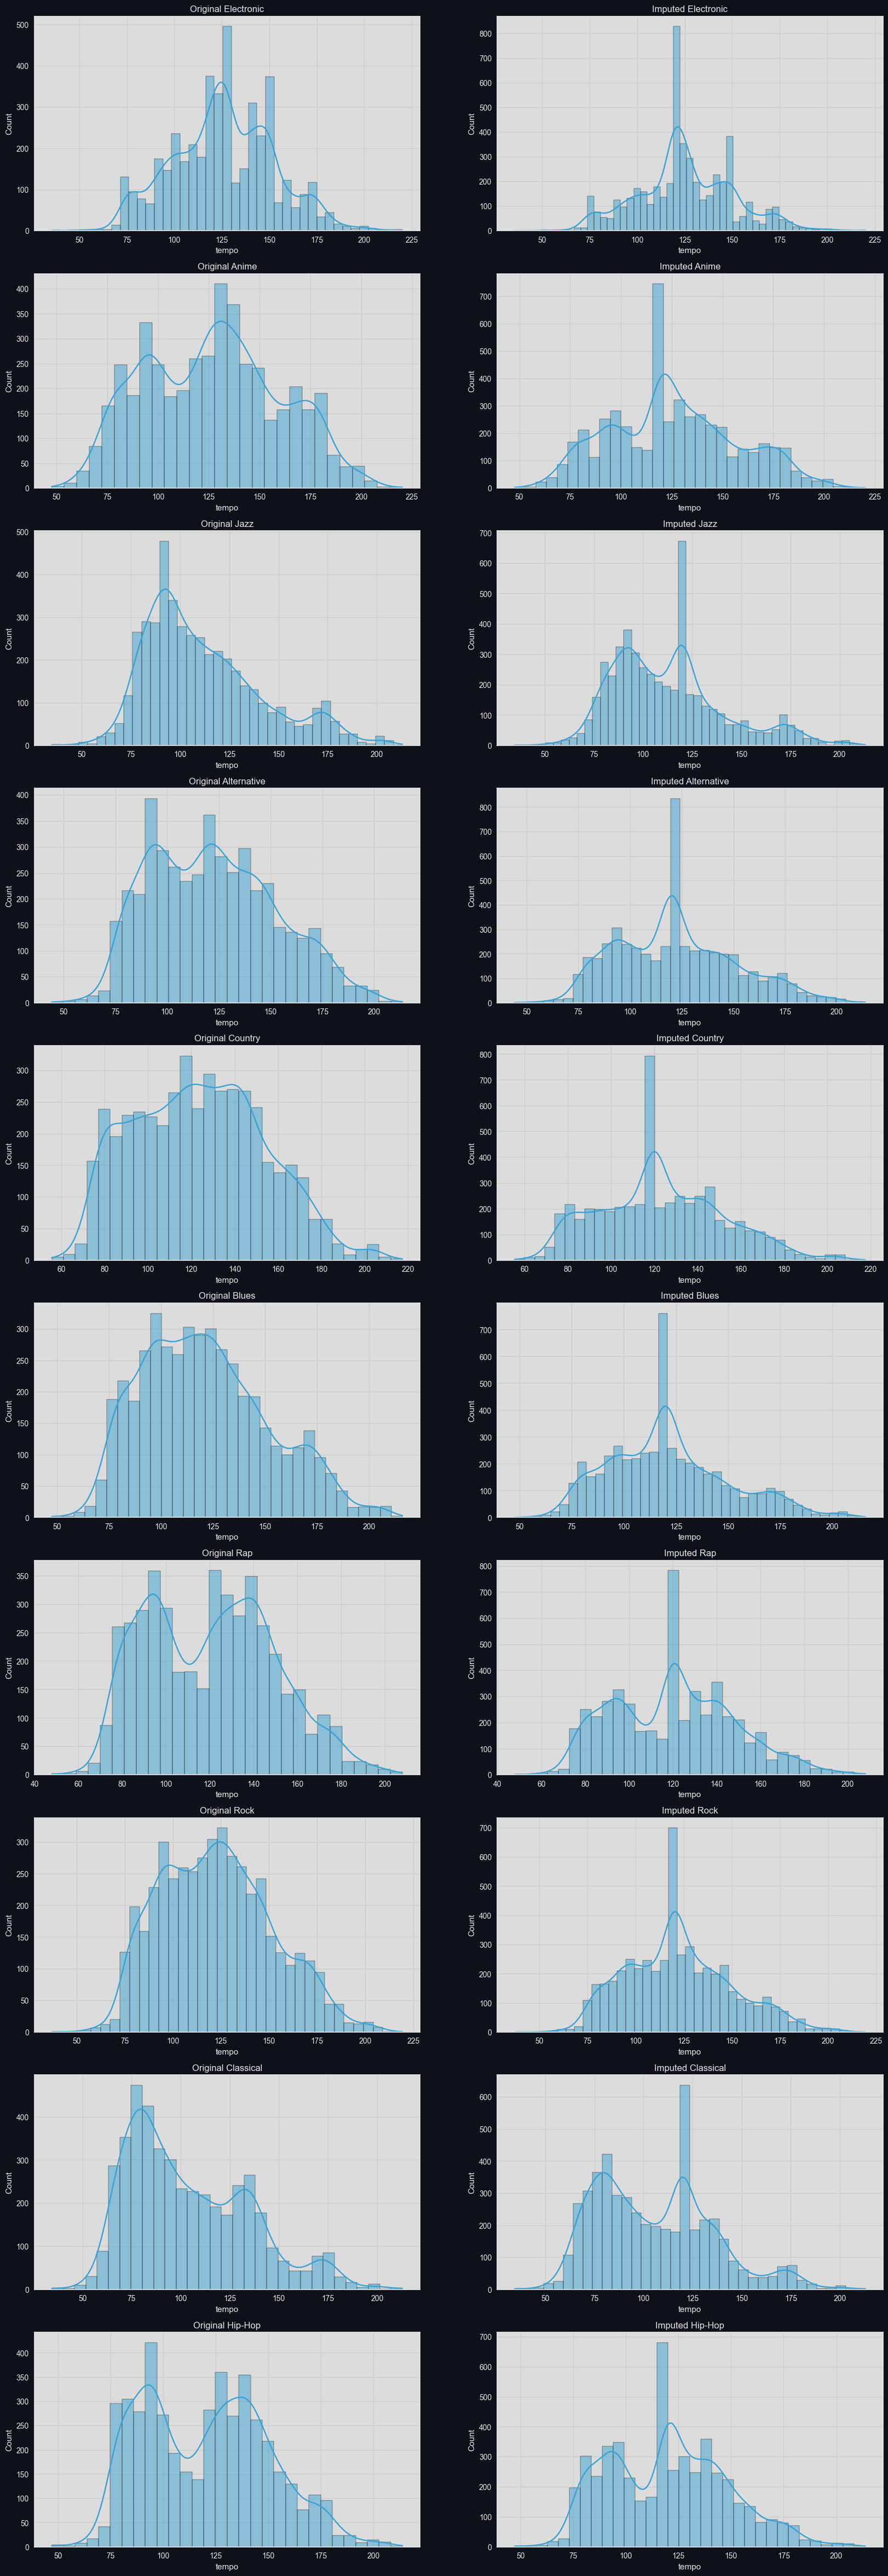

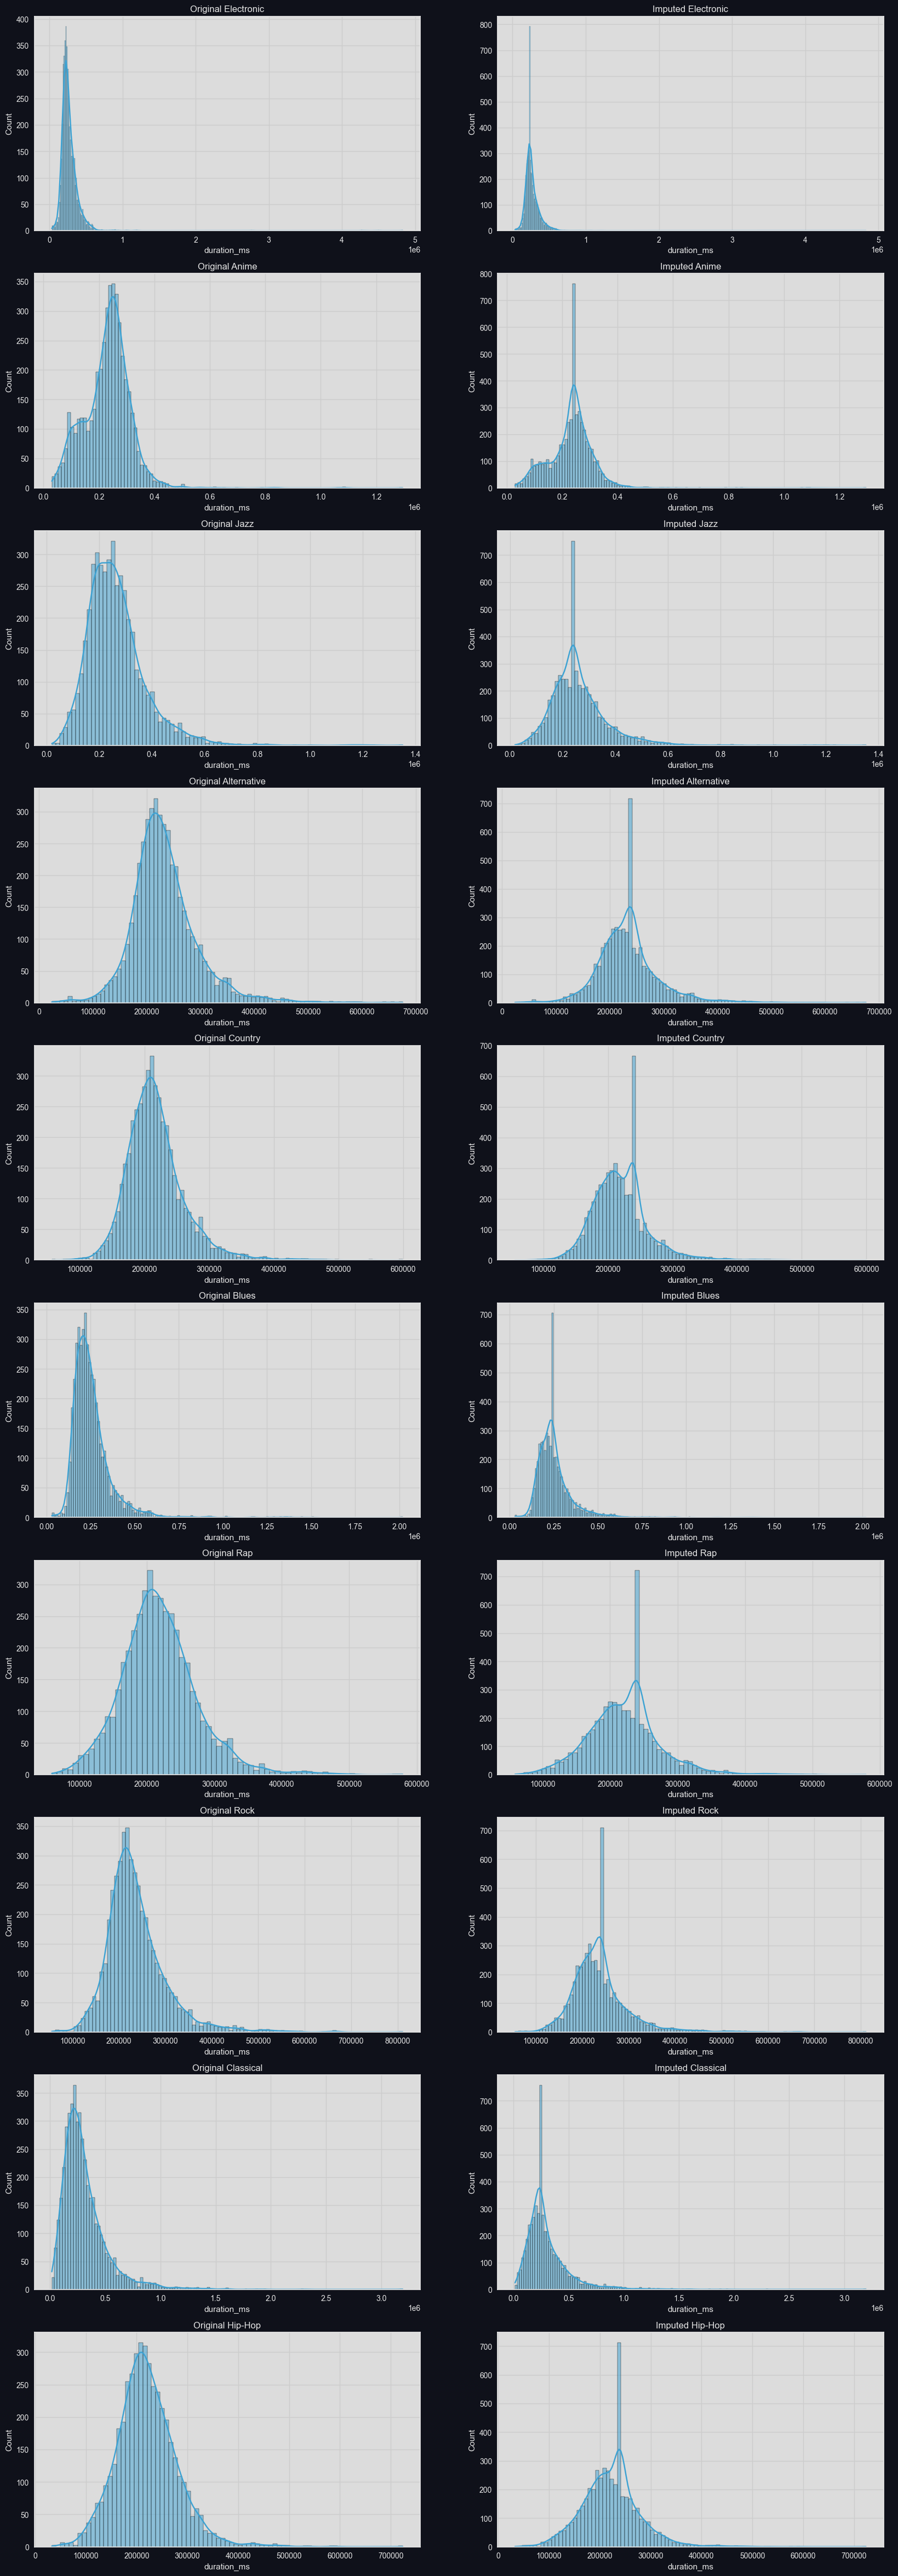

In [519]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_impute_mode = df_impute.copy()
df_impute_mode['tempo'] = imp_mode.fit_transform(df_impute_mode[['tempo']])
df_impute_mode['duration_ms'] = imp_mode.fit_transform(df_impute_mode[['duration_ms']])
imputeHists_mode_tempo_compare = plotForImpute(df_vis , 'tempo', df_impute_mode, ['Original ','Imputed '])
imputeHists_mode_duration_ms_compare = plotForImpute(df_vis , 'duration_ms', df_impute_mode, ['Original ','Imputed '])

From the histogram, we can see that the distribution of the data is not quite the same as before. So we decided not to use the mean and the most frequent value to impute the missing values.

#### **Imputation Using Multivariate Imputation by Chained Equations(mice)**

In [520]:
from impyute.imputation.cs import mice

df_impute_mice = df_impute.copy()
df_impute_mice.drop(['music_genre','key','mode'], axis=1, inplace=True)
imputed_training=mice(df_impute_mice.values)

In [521]:
df_impute_mice = pd.DataFrame(imputed_training, columns=df_impute_mice.columns)
df_impute_mice['key'] = df_impute['key']
df_impute_mice['mode'] = df_impute['mode']
df_impute_mice['music_genre'] = df_impute['music_genre']
df_impute_mice

popularity  acousticness  danceability    duration_ms  energy  \
0            27.0       0.00468         0.652  253256.337639   0.941   
1            31.0       0.01270         0.622  218293.000000   0.890   
2            28.0       0.00306         0.620  215613.000000   0.755   
3            34.0       0.02540         0.774  166875.000000   0.700   
4            32.0       0.00465         0.638  222369.000000   0.587   
...           ...           ...           ...            ...     ...   
49995        59.0       0.03340         0.913  209365.433889   0.574   
49996        72.0       0.15700         0.709  251860.000000   0.362   
49997        51.0       0.00597         0.693  189483.000000   0.763   
49998        65.0       0.08310         0.782  262773.000000   0.472   
49999        67.0       0.10200         0.862  267267.000000   0.642   

       instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0               0.79200     0.115    -5.201       0.0748  100.889    0.759   
1               0.95000     0.124    -7.043       0.0300  115.002    0.531   
2               0.01180     0.534    -4.617       0.0345  127.994    0.333   
3               0.00253     0.157    -4.498       0.2390  128.014    0.270   
4               0.90900     0.157    -6.266       0.0413  145.036    0.323   
...                 ...       ...       ...          ...      ...      ...   
49995           0.00000     0.119    -7.022       0.2980   98.028    0.330   
49996           0.00000     0.109    -9.814       0.0550  122.043    0.113   
49997           0.00000     0.143    -5.443       0.1460  131.079    0.395   
49998           0.00000     0.106    -5.016       0.0441   75.886    0.354   
49999           0.00000     0.272   -13.652       0.1010   99.201    0.765   

      key   mode music_genre  
0      A#  Minor  Electronic  
1       D  Minor  Electronic  
2      G#  Major  Electronic  
3      C#  Major  Electronic  
4      F#  Major  Electronic  
...    ..    ...         ...  
49995  C#  Major     Hip-Hop  
49996   B  Major     Hip-Hop  
49997   D  Major     Hip-Hop  
49998   G  Minor     Hip-Hop  
49999  F#  Minor     Hip-Hop  

[50000 rows x 14 columns]

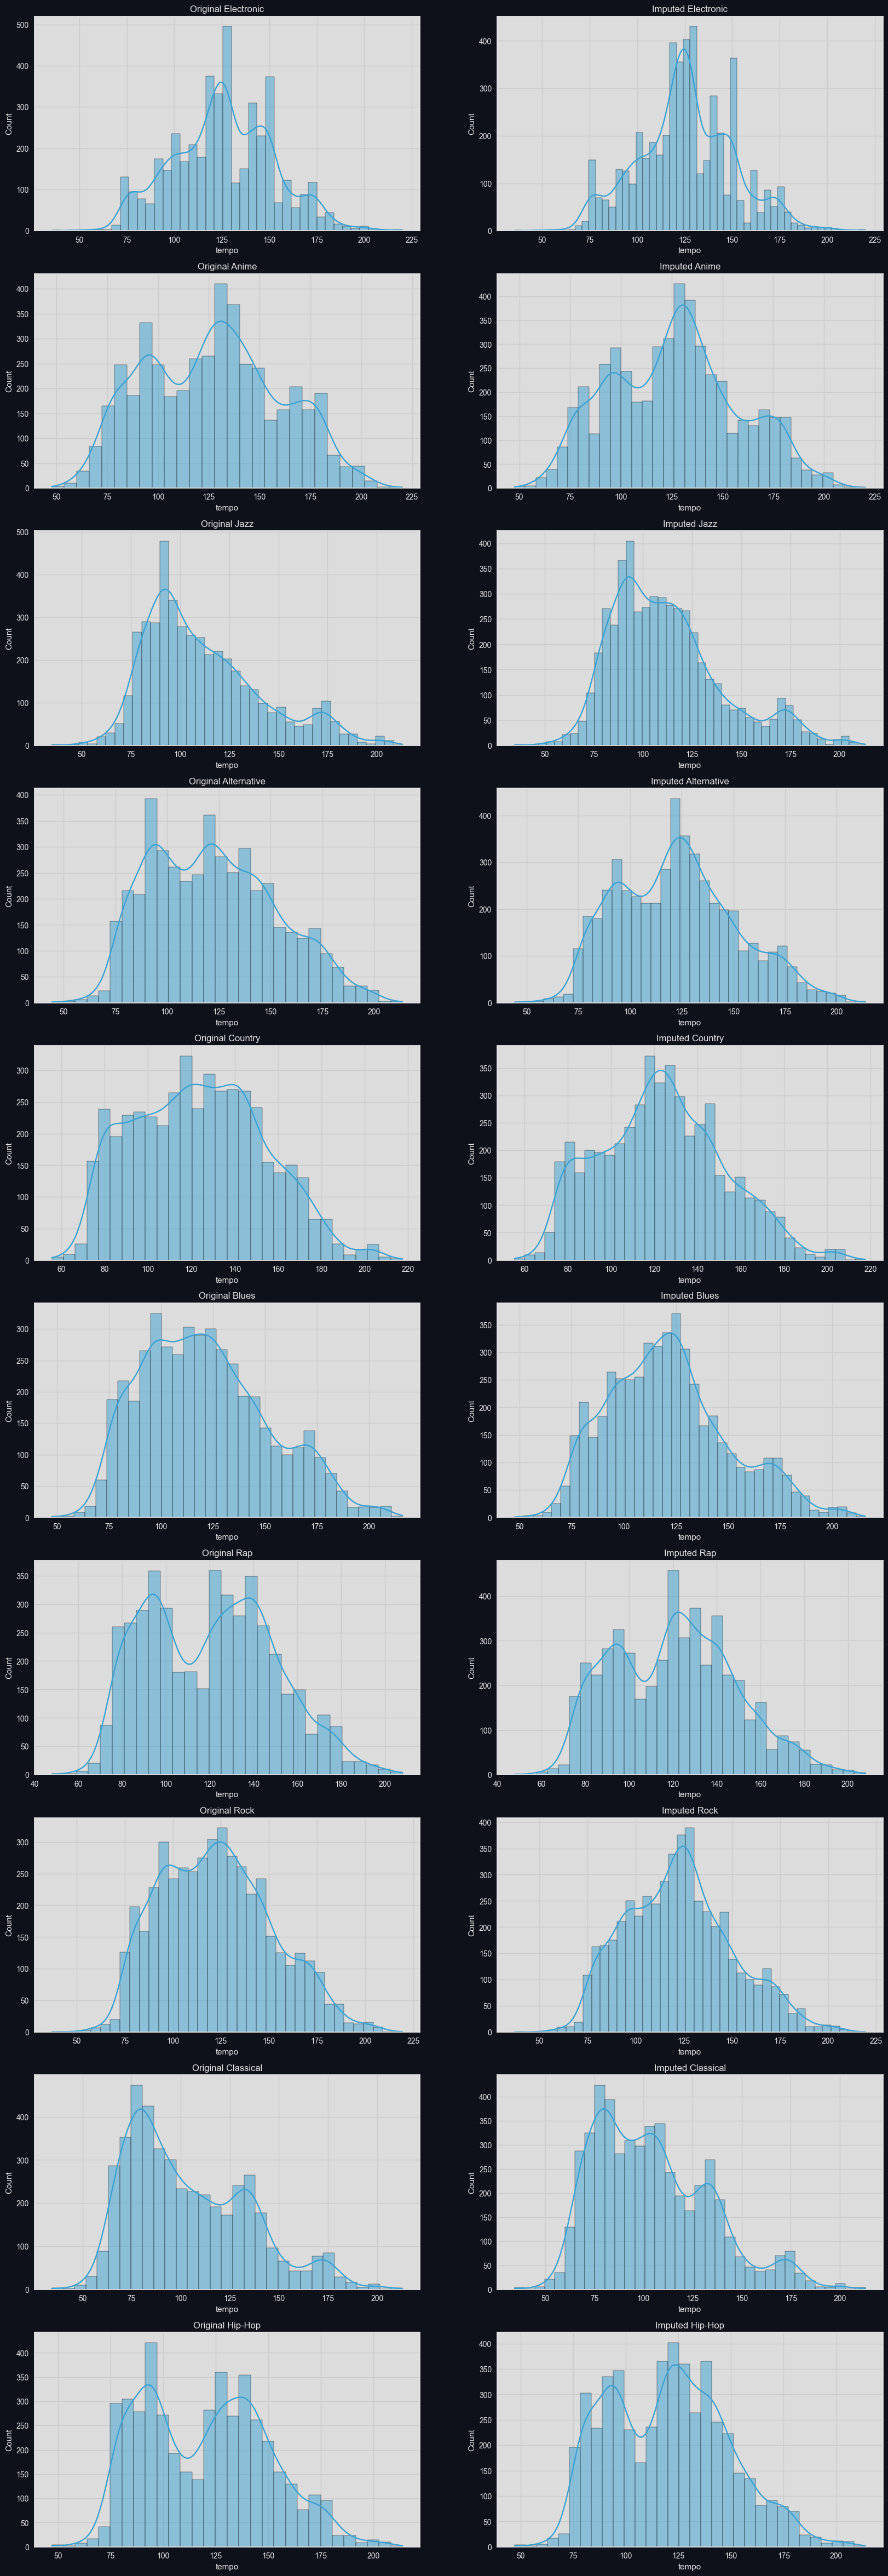

In [522]:
imputeHists_mice_tempo_compare = plotForImpute(df_vis , 'tempo', df_impute_mice, ['Original ','Imputed '])

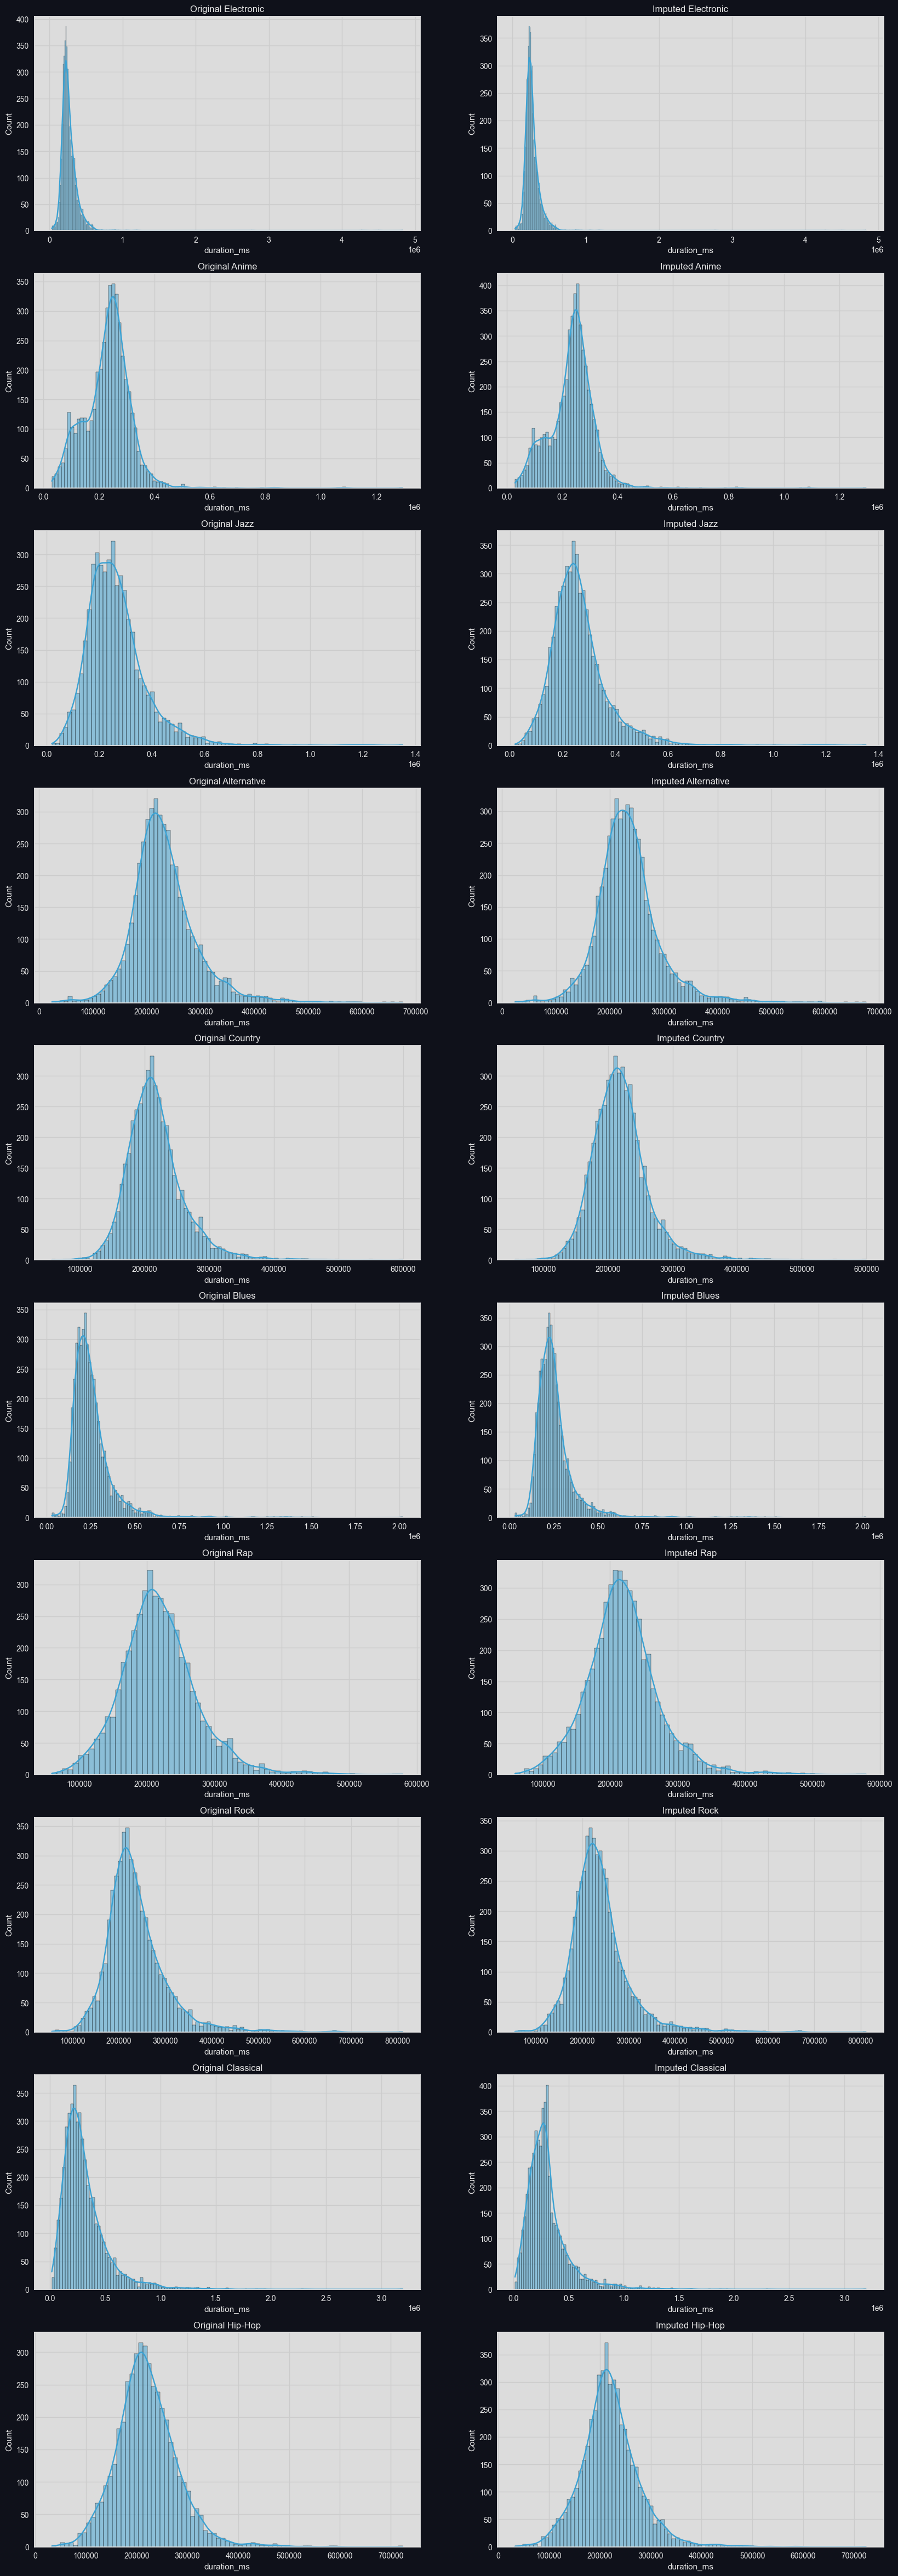

In [523]:
imputeHists_mice_duration_ms_compare = plotForImpute(df_vis , 'duration_ms', df_impute_mice, ['Original ','Imputed '])

From the histogram, we can see that the distribution of the data is quite the same as before. So we decided to use the mice to impute the missing values.

#### **Imputation Using KNNImputer**

In [566]:
# Impute missing values
df_impute_knn = df_impute.copy()
df_impute_knn = pd.get_dummies(df_impute_knn, columns=['key','mode','music_genre'], drop_first=True)
col_knn = df_impute_knn.columns

In [567]:
scaler_knnimpute = MinMaxScaler()
df_impute_knn = pd.DataFrame(scaler_knnimpute.fit_transform(df_impute_knn), columns=col_knn)
df_impute_knn.head()

popularity  acousticness  danceability  duration_ms    energy  \
0    0.272727      0.004699      0.639465          NaN  0.941896   
1    0.313131      0.012751      0.607081     0.042114  0.890804   
2    0.282828      0.003072      0.604922     0.041558  0.755562   
3    0.343434      0.025502      0.771157     0.031436  0.700463   
4    0.323232      0.004669      0.624352     0.042961  0.587260   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  \
0          0.795181  0.106358  0.823883     0.057084  0.357889  ...   
1          0.953815  0.115446  0.787616     0.008372  0.433795  ...   
2          0.011847  0.529450  0.835381     0.013265  0.503671  ...   
3          0.002540  0.148769  0.837724     0.235620  0.503778  ...   
4          0.912651  0.148769  0.802914     0.020659  0.595329  ...   

   mode_Minor  music_genre_Anime  music_genre_Blues  music_genre_Classical  \
0         1.0                0.0                0.0                    0.0   
1         1.0                0.0                0.0                    0.0   
2         0.0                0.0                0.0                    0.0   
3         0.0                0.0                0.0                    0.0   
4         0.0                0.0                0.0                    0.0   

   music_genre_Country  music_genre_Electronic  music_genre_Hip-Hop  \
0                  0.0                     1.0                  0.0   
1                  0.0                     1.0                  0.0   
2                  0.0                     1.0                  0.0   
3                  0.0                     1.0                  0.0   
4                  0.0                     1.0                  0.0   

   music_genre_Jazz  music_genre_Rap  music_genre_Rock  
0               0.0              0.0               0.0  
1               0.0              0.0               0.0  
2               0.0              0.0               0.0  
3               0.0              0.0               0.0  
4               0.0              0.0               0.0  

[5 rows x 32 columns]

In [568]:
imputer = KNNImputer(n_neighbors=5)
df_impute_knn = pd.DataFrame(imputer.fit_transform(df_impute_knn), columns=col_knn)
df_impute_knn = pd.DataFrame(scaler_knnimpute.inverse_transform(df_impute_knn), columns=col_knn)

popularity  acousticness  danceability  duration_ms  energy  \
0        27.0       0.00468         0.652     286961.0   0.941   
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4        32.0       0.00465         0.638     222369.0   0.587   

   instrumentalness  liveness  loudness  speechiness    tempo  ...  \
0           0.79200     0.115    -5.201       0.0748  100.889  ...   
1           0.95000     0.124    -7.043       0.0300  115.002  ...   
2           0.01180     0.534    -4.617       0.0345  127.994  ...   
3           0.00253     0.157    -4.498       0.2390  128.014  ...   
4           0.90900     0.157    -6.266       0.0413  145.036  ...   

   mode_Minor  music_genre_Anime  music_genre_Blues  music_genre_Classical  \
0         1.0                0.0                0.0                    0.0   
1         1.0                0.0                0.0                    0.0   
2         0.0                0.0                0.0                    0.0   
3         0.0                0.0                0.0                    0.0   
4         0.0                0.0                0.0                    0.0   

   music_genre_Country  music_genre_Electronic  music_genre_Hip-Hop  \
0                  0.0                     1.0                  0.0   
1                  0.0                     1.0                  0.0   
2                  0.0                     1.0                  0.0   
3                  0.0                     1.0                  0.0   
4                  0.0                     1.0                  0.0   

   music_genre_Jazz  music_genre_Rap  music_genre_Rock  
0               0.0              0.0               0.0  
1               0.0              0.0               0.0  
2               0.0              0.0               0.0  
3               0.0              0.0               0.0  
4               0.0              0.0               0.0  

[5 rows x 32 columns]

In [569]:
duration_ms = df_impute_knn['duration_ms']
tempo = df_impute_knn['tempo']
df_impute_knn = df_impute.copy()
df_impute_knn['duration_ms'] = duration_ms
df_impute_knn['tempo'] = tempo
df_impute_knn

popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652     286961.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
49995        59.0       0.03340         0.913     216690.6   0.574   
49996        72.0       0.15700         0.709     251860.0   0.362   
49997        51.0       0.00597         0.693     189483.0   0.763   
49998        65.0       0.08310         0.782     262773.0   0.472   
49999        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0               0.79200     0.115    -5.201       0.0748  100.889    0.759   
1               0.95000     0.124    -7.043       0.0300  115.002    0.531   
2               0.01180     0.534    -4.617       0.0345  127.994    0.333   
3               0.00253     0.157    -4.498       0.2390  128.014    0.270   
4               0.90900     0.157    -6.266       0.0413  145.036    0.323   
...                 ...       ...       ...          ...      ...      ...   
49995           0.00000     0.119    -7.022       0.2980   98.028    0.330   
49996           0.00000     0.109    -9.814       0.0550  122.043    0.113   
49997           0.00000     0.143    -5.443       0.1460  131.079    0.395   
49998           0.00000     0.106    -5.016       0.0441   75.886    0.354   
49999           0.00000     0.272   -13.652       0.1010   99.201    0.765   

      key   mode music_genre  
0      A#  Minor  Electronic  
1       D  Minor  Electronic  
2      G#  Major  Electronic  
3      C#  Major  Electronic  
4      F#  Major  Electronic  
...    ..    ...         ...  
49995  C#  Major     Hip-Hop  
49996   B  Major     Hip-Hop  
49997   D  Major     Hip-Hop  
49998   G  Minor     Hip-Hop  
49999  F#  Minor     Hip-Hop  

[50000 rows x 14 columns]

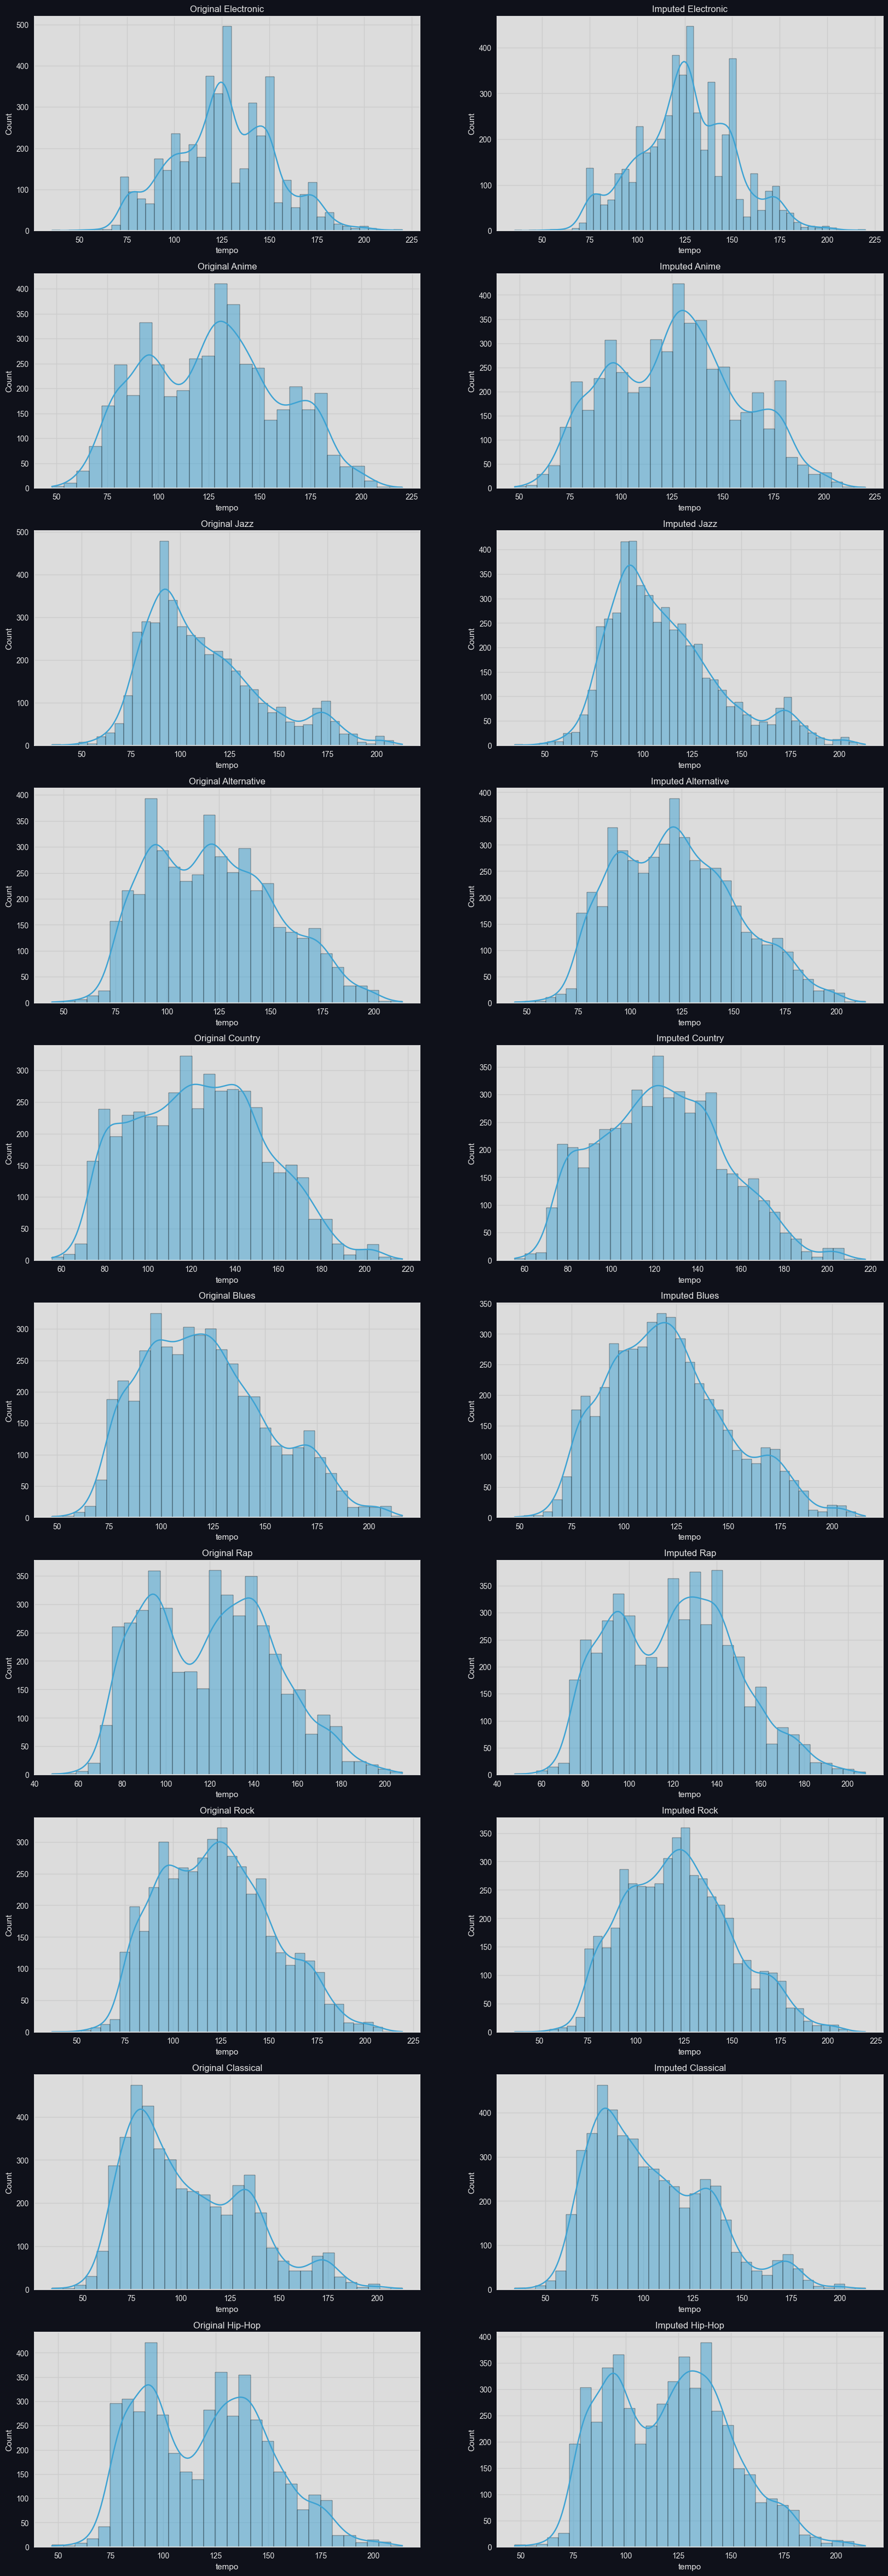

In [570]:
imputeHists_KNN_tempo_compare = plotForImpute(df_vis , 'tempo', df_impute_knn, ['Original ','Imputed '])

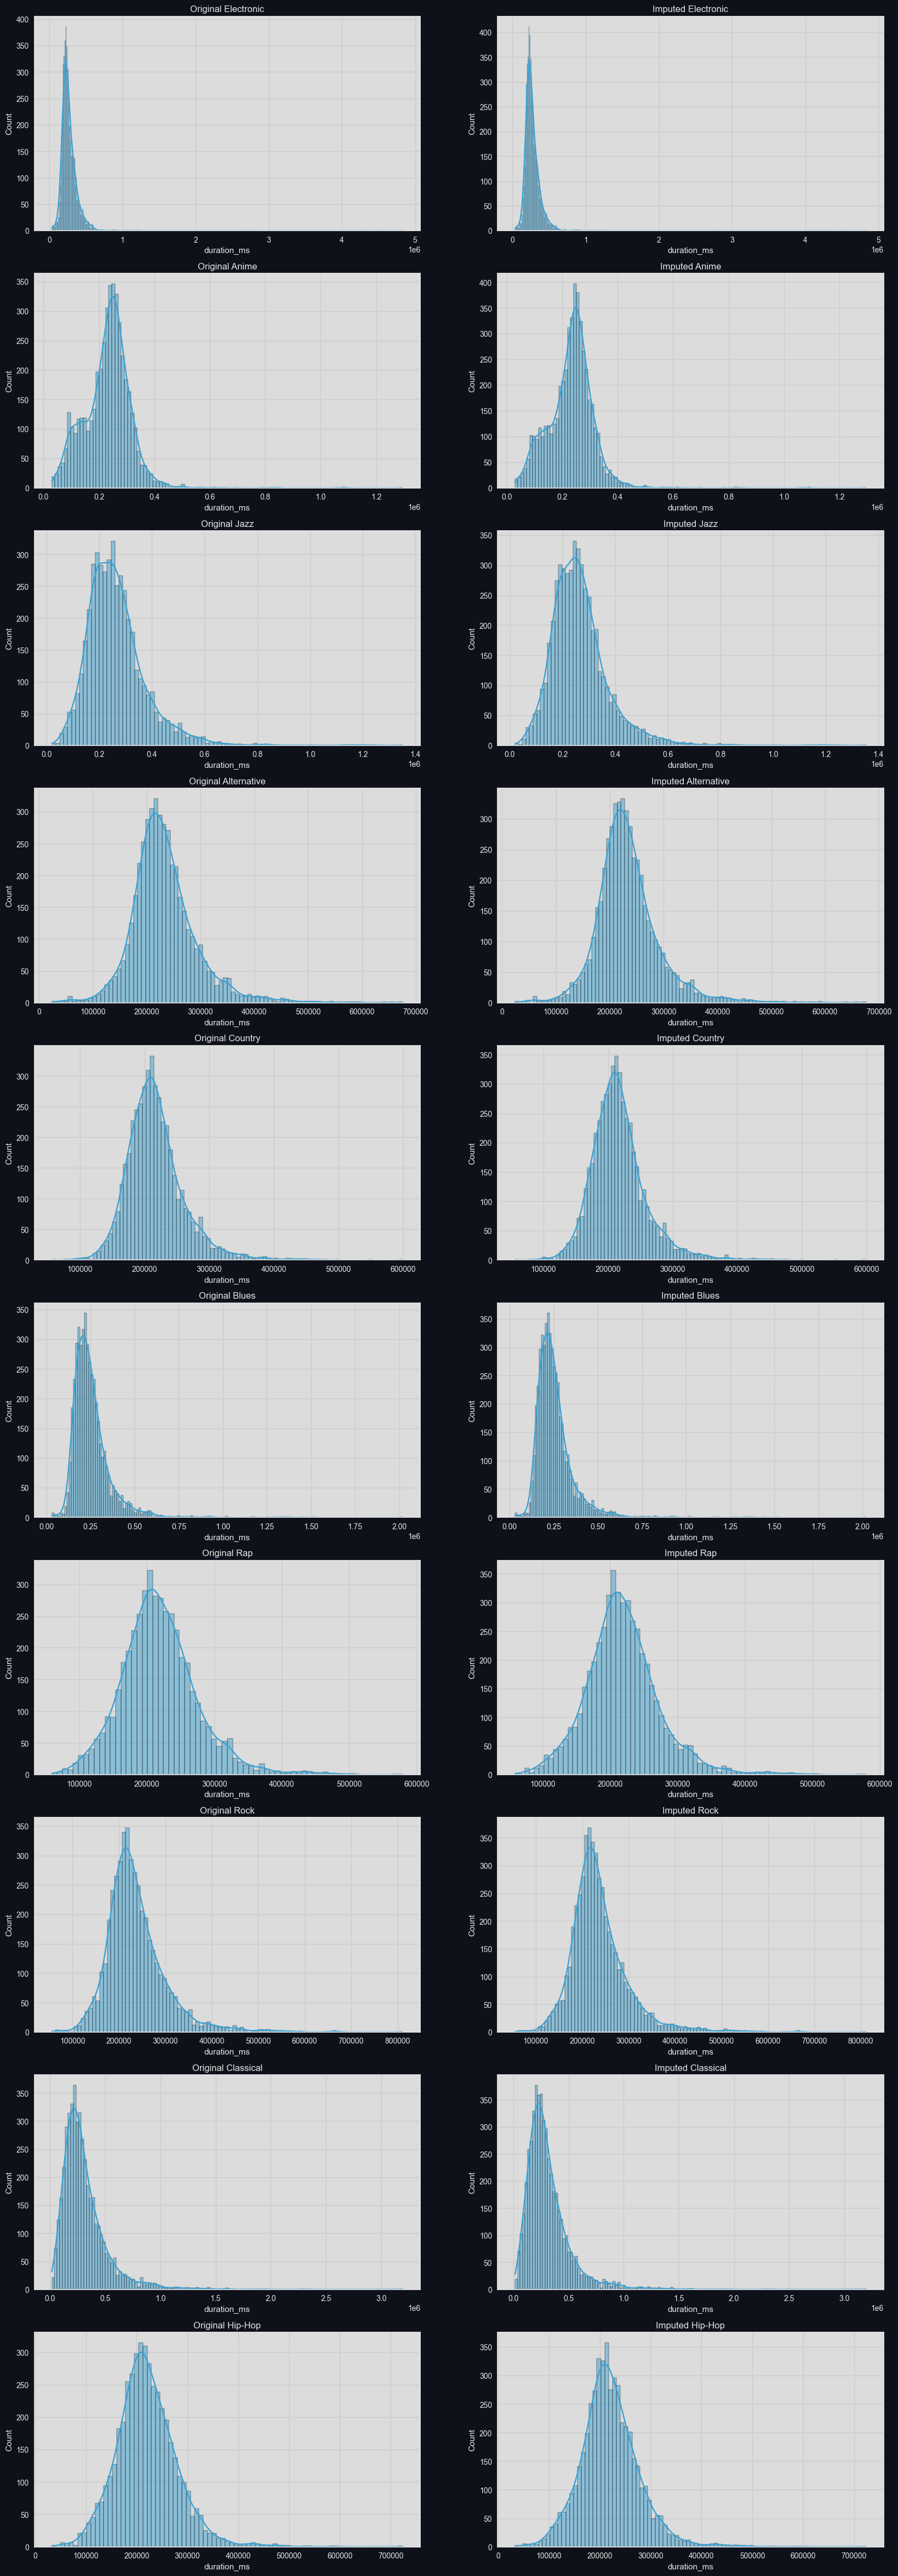

In [571]:
imputeHists_KNN_duration_ms_compare = plotForImpute(df_vis , 'duration_ms', df_impute_knn, ['Original ','Imputed '])

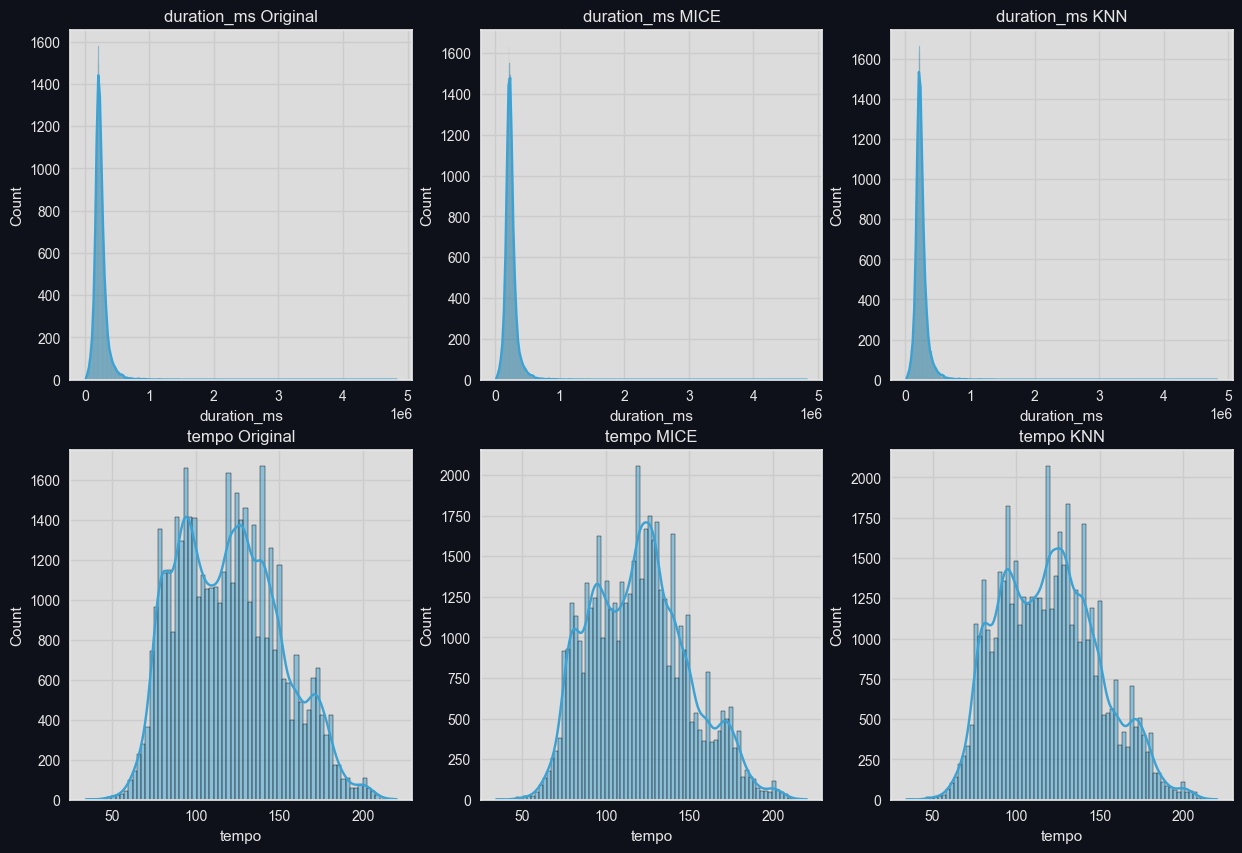

In [583]:
coltoplot = ['duration_ms','tempo']
dftoplot = [df_vis, df_impute_mice, df_impute_knn]
titlelist = ['Original','MICE','KNN']
NumHists_knn, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, df in enumerate(dftoplot):
    for j, col in enumerate(coltoplot):
        ax = axes[j, i]
        sns.histplot(df[col], ax=ax, color=snsPalette[0], kde=True)
        ax.set_title(f'{col} '+titlelist[i])
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_facecolor(axBGColor)

We cant use KNNImputer as it unable to allocate memory for an array with the shape of this dataset (500000, 18) as it is too large.

#### **Conclusion**

babababababababababababababa